# Which store has the highest sales across your entire date range?  

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
df_sales = pd.read_csv('Processed/data_clean.csv')
df_items = pd.read_csv('Processed/items_clean.csv')
df_stores = pd.read_csv('Processed/stores_clean.csv') # Not used but can be used to go from store_nbr to name

## Sales defined as most units sold

store_nbr
44    1.039714e+06
45    9.076982e+05
47    8.467284e+05
3     8.303304e+05
49    7.227064e+05
46    6.973317e+05
48    5.933064e+05
51    5.404109e+05
8     5.084545e+05
11    4.827887e+05
Name: unit_sales, dtype: float64


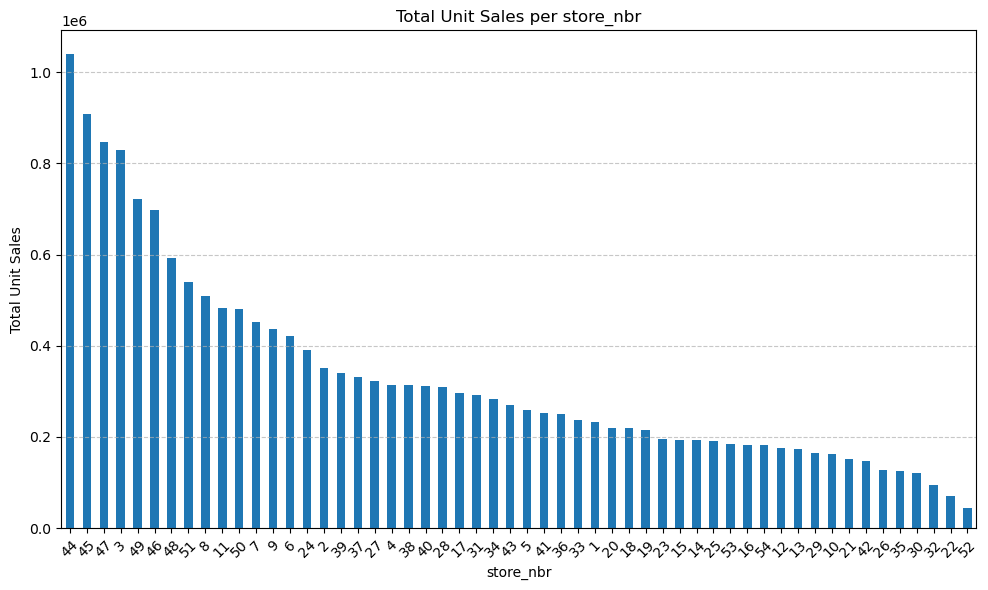

In [15]:
unit_sales_per_store = df_sales.groupby('store_nbr')['unit_sales'].sum()
unit_sales_per_store = unit_sales_per_store.sort_values(ascending=False)

# Get top 10 stores
top_10_stores = unit_sales_per_store.head(10)
print(top_10_stores)

plt.figure(figsize=(10, 6))
unit_sales_per_store.plot(kind='bar')
plt.title('Total Unit Sales per store_nbr')
plt.xlabel('store_nbr')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

## Sales defined as profit

store_nbr
44    7.982976e+06
45    7.024475e+06
47    6.426301e+06
3     6.320743e+06
49    5.511407e+06
46    5.358286e+06
48    4.594583e+06
51    4.070007e+06
8     3.906655e+06
11    3.812625e+06
Name: total_sales, dtype: float64


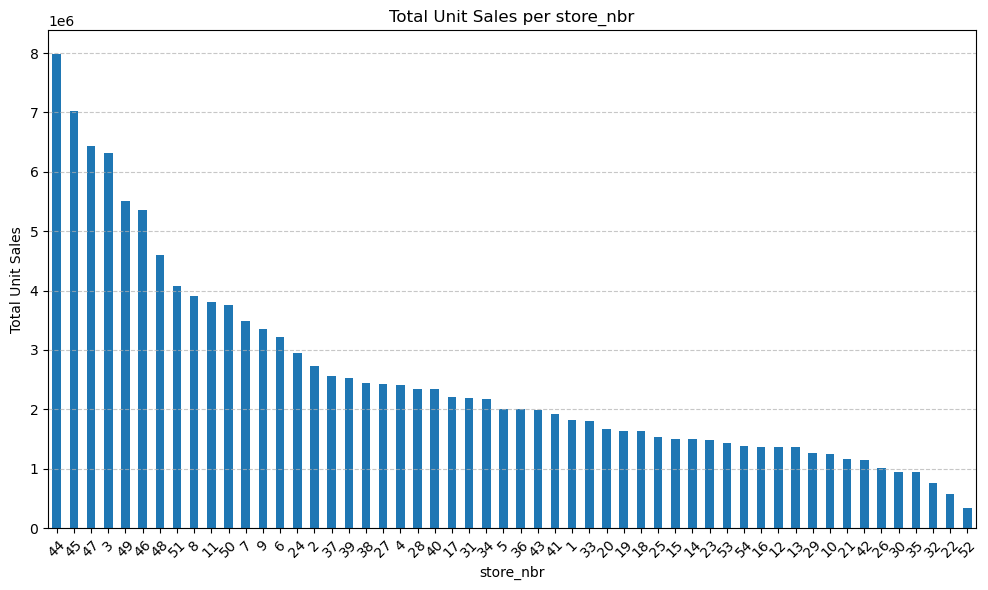

In [20]:
# Merge dataframes based on item_nbr
merged_df = pd.merge(df_sales, df_items, on='item_nbr')

# Calculate new column for unit_sales multiplied by item price
merged_df['total_sales'] = merged_df['unit_sales'] * merged_df['Price']

total_sales_per_store = merged_df.groupby('store_nbr')['total_sales'].sum()
total_sales_per_store = total_sales_per_store.sort_values(ascending=False)

# Get top 10 stores
top_10_stores = total_sales_per_store.head(10)
print(top_10_stores)

plt.figure(figsize=(10, 6))
total_sales_per_store.plot(kind='bar')
plt.title('Total Unit Sales per store_nbr')
plt.xlabel('store_nbr')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

# Conclusion

Same top 10:
1. 44
1. 45
1. 47
1. 3
1. 49
1. 46
1. 48
1. 51
1. 8
1. 11 